## Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.<br> 





### дисклеймер
я немного упоролся с заданием и решил сначала графически посмотреть, как будут выглядеть средние/сигмы при стандартизации данных, а потом посмотреть как будет с метриками (r2, квадраты и абсолютные разности) при просто скейлинге, а потом если убирать колонки, которые вносят мало веса

In [67]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

In [5]:
boston = sklearn.datasets.load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
data = boston['data']
features = boston['feature_names']
target = boston['target']

Создайте датафреймы X и Y из этих данных.<br>

In [13]:
X = pd.DataFrame(data, columns=features)

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
Y = pd.DataFrame(target, columns=['price'])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы н а тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split <br>так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.<br>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:
print(X_train.shape,'\n',X_test.shape)


(354, 13) 
 (152, 13)


Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.<br>

In [30]:
lr = LinearRegression()

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.<br>

In [59]:
lr.fit(X_train, y_train)

LinearRegression()

посмотрим коэффициенты $w_{i}$

In [43]:
print(lr.intercept_, '\n',lr.coef_ )

[31.63108404] 
 [[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]


In [60]:
y_pred = lr.predict(X_test)

Вычислите $R^{2}$ полученных предказаний с помощью r2_score из модуля sklearn.metrics.<br>

In [66]:
r2_raw = metrics.r2_score(y_test, y_pred)
mse_raw = metrics.mean_squared_error(y_test, y_pred)
abs_raw = metrics.mean_absolute_error(y_test, y_pred)
print(f" R2: {r2_raw}\n mse: {mse_raw}\n abs: {abs_raw}")

 R2: 0.7112260057484943
 mse: 21.517444231177134
 abs: 3.1627098714573902


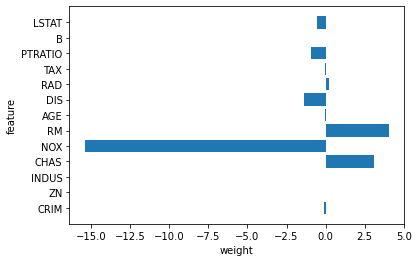

In [48]:
plt.barh(features, lr.coef_.flatten())
plt.xlabel('weight')
plt.ylabel('feature')
plt.show()

скейлим

In [79]:
scaler_std = preprocessing.StandardScaler()

In [142]:
X_train_scaled = scaler_std.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02
mean,-1.262330e-16,-4.829784e-17,3.724736e-15,-6.680155e-17,-5.443229e-15,-1.594064e-15,-6.962416e-17,-2.244595e-15,-8.185543e-17,-1.890359e-16,1.728498e-14,8.116546e-15,-7.533208e-16
std,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00
min,-4.167624e-01,-5.051250e-01,-1.432137e+00,-2.815463e-01,-1.477013e+00,-3.428977e+00,-2.385402e+00,-1.241753e+00,-9.779889e-01,-1.323270e+00,-2.519507e+00,-4.140252e+00,-1.505295e+00
25%,-4.079402e-01,-5.051250e-01,-8.663857e-01,-2.815463e-01,-9.196796e-01,-6.073179e-01,-8.243866e-01,-7.970573e-01,-6.302741e-01,-7.700089e-01,-7.223839e-01,1.967778e-01,-7.826466e-01
50%,-3.869638e-01,-5.051250e-01,-2.082672e-01,-2.815463e-01,-1.651363e-01,-1.366932e-01,3.094984e-01,-3.102052e-01,-5.143691e-01,-4.633100e-01,1.428974e-01,3.674826e-01,-2.106528e-01
75%,-2.266349e-02,3.807519e-01,1.005500e+00,-2.815463e-01,6.322788e-01,4.957956e-01,8.931822e-01,7.700449e-01,1.687825e+00,1.557294e+00,8.528718e-01,4.201600e-01,5.355791e-01
max,1.029691e+01,3.702790e+00,2.396785e+00,3.551814e+00,2.690124e+00,3.417358e+00,1.129371e+00,3.938069e+00,1.687825e+00,1.827911e+00,1.651593e+00,4.285411e-01,3.597242e+00


In [120]:
scaled_graph = X_train_scaled.describe().T[['std', 'mean']]

Я немного упоролся с графиками. Стало интересно, чтобы наглядно сделать, как среднее и сигма меняются при скейлинге. Причем, среднее так себя ведет, что если пихнуть на один график и начальное и скейленное среднее, то из-за очень маленьких отрицательных значений среднего, они не видны, поэтому я сделал два отдельных графика для среднего

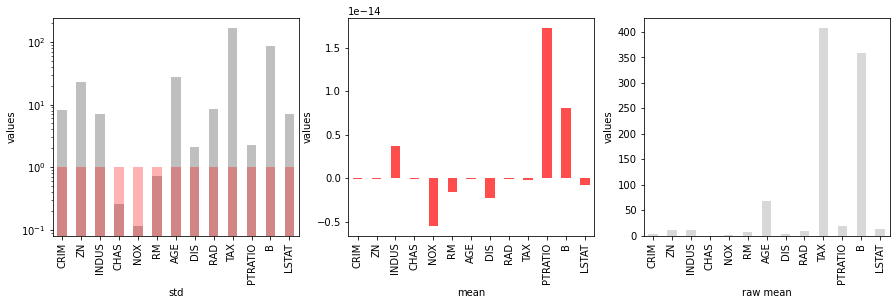

In [139]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
X_train_T['std'].plot(kind="bar", color='grey', alpha=0.5, logy=True)
scaled_graph['std'].plot(kind='bar', color='red', alpha=0.3, logy=True)
plt.xlabel("std")
plt.ylabel("values")

plt.subplot(132)
scaled_graph['mean'].plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('mean')
plt.ylabel("values")

plt.subplot(133)
X_train_T['mean'].plot(kind="bar", color='grey', alpha=0.3)
plt.xlabel('raw mean')
plt.ylabel("values")

plt.show()

In [140]:
X_test_scaled = scaler_std.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

In [141]:
X_test_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.057581,-0.005945,0.001791,-0.054571,-0.073193,-0.190217,-0.027090,0.045737,0.043042,0.023919,0.262297,-0.116118,0.108710
std,1.114253,1.106630,0.966544,0.907734,0.976422,0.911601,1.061702,0.971695,1.029860,1.044377,0.832820,1.160034,1.014019
min,-0.417092,-0.505125,-1.540380,-0.281546,-1.416992,-3.849476,-2.265950,-1.223147,-0.977989,-1.317256,-2.342013,-4.114907,-1.343377
25%,-0.408255,-0.505125,-0.785203,-0.281546,-0.930398,-0.630640,-1.053336,-0.729677,-0.630274,-0.763995,-0.212090,0.120311,-0.695352
50%,-0.388586,-0.505125,-0.208267,-0.281546,-0.216582,-0.231375,0.351125,-0.085220,-0.514369,-0.463310,0.409138,0.359764,-0.056478
75%,0.108052,-0.505125,1.005500,-0.281546,0.486515,0.191909,0.948383,0.598109,1.687825,1.557294,0.852872,0.421715,0.738329
max,8.437327,3.924259,2.396785,3.551814,2.690124,3.340777,1.129371,3.271002,1.687825,1.827911,1.651593,0.428541,3.457851


Теперь посмотрим, как влияет просто скейлинг на ошибки предсказаний при линейной регрессии

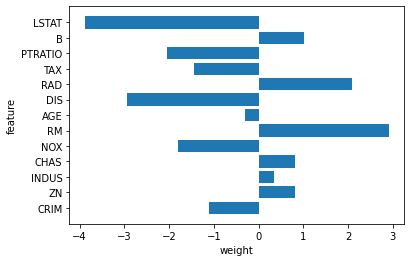

In [143]:
lr.fit(X_train_scaled, y_train)

plt.barh(features, lr.coef_.flatten())
plt.xlabel('weight')
plt.ylabel('feature')
plt.show()

In [144]:
y_pred_after_scale = lr.predict(X_test_scaled)

In [146]:
r2_scaled = metrics.r2_score(y_test, y_pred_after_scale)
mse_scaled = metrics.mean_squared_error(y_test, y_pred_after_scale)
abs_scaled = metrics.mean_absolute_error(y_test, y_pred_after_scale)

print(f" R2: {r2_scaled} was {r2_raw}\n mse: {mse_scaled} was {mse_raw}\n abs: {abs_scaled} was {abs_raw}")

 R2: 0.7112260057484932 was 0.7112260057484943
 mse: 21.51744423117721 was 21.517444231177134
 abs: 3.1627098714574053 was 3.1627098714573902


Очевидно, что никак

А теперь отсортируем фичи по возрастанию их весов в линейной регрессии

In [153]:
feature_weight = dict(zip(features, abs(lr.coef_.flatten())))

In [188]:
feature_weight = dict(sorted(feature_weight.items(), key=lambda item: item[1]))
feature_weight.pop('LSTAT')
feature_weight

{'AGE': 0.2989391755039225,
 'INDUS': 0.3431346557047966,
 'ZN': 0.8084399775400768,
 'CHAS': 0.813864257388578,
 'B': 1.0237518746405985,
 'CRIM': 1.1083460154177533,
 'TAX': 1.4470673128119897,
 'NOX': 1.7980429490588974,
 'PTRATIO': 2.052322324086821,
 'RAD': 2.0941930300437583,
 'RM': 2.913857995549769,
 'DIS': 2.942511476980692}

А теперь будем убирать по одной фиче и смотреть, как будут меняться метрики

In [189]:
r2_graph = []
mse_graph = []
ame_graph = []
cropped_df_train = X_train_scaled
cropped_df_test = X_test_scaled

for i in feature_weight.keys():
    print(i)
    cropped_df_train = cropped_df_train.drop(columns=i)
    cropped_df_test = cropped_df_test.drop(columns=i)
    #print(cropped_df_train.columns)
    #print(cropped_df_test.columns)
    lr.fit(cropped_df_train, y_train)
    y_pred_cropped = lr.predict(cropped_df_test)
    r2_graph.append(metrics.r2_score(y_test, y_pred_cropped))
    mse_graph.append(metrics.mean_squared_error(y_test, y_pred_cropped))
    ame_graph.append(metrics.mean_absolute_error(y_test, y_pred_cropped))
    print(f'r2: {metrics.r2_score(y_test, y_pred_cropped)}, mse: {metrics.mean_squared_error(y_test, y_pred_cropped)}, ame: {metrics.mean_absolute_error(y_test, y_pred_cropped)}')
    

AGE
r2: 0.7138676903216832, mse: 21.32060413611495, ame: 3.1291133750431457
INDUS
r2: 0.7149039348907364, mse: 21.2433903455094, ame: 3.113787289886371
ZN
r2: 0.7015003386944134, mse: 22.242133789839112, ame: 3.1968689403058326
CHAS
r2: 0.7001481595606636, mse: 22.34288884285709, ame: 3.2341202800915103
B
r2: 0.7082844781828799, mse: 21.736626555789268, ame: 3.261573132853956
CRIM
r2: 0.7108604374224152, mse: 21.544683858794848, ame: 3.216827953507758
TAX
r2: 0.6981554117912063, mse: 22.491374647845312, ame: 3.3061402905161827
NOX
r2: 0.6613625989838843, mse: 25.232921024767936, ame: 3.469332478227639
PTRATIO
r2: 0.6135581438114517, mse: 28.794978961601224, ame: 3.933596807426078
RAD
r2: 0.6060897200518729, mse: 29.35147433494005, ame: 4.000208847061039
RM
r2: 0.5128403996698898, mse: 36.29976985620141, ame: 4.6666490054067005
DIS
r2: 0.4886979007906852, mse: 38.09870218243471, ame: 4.752100511437849


Text(0.5, 1.0, 'ame')

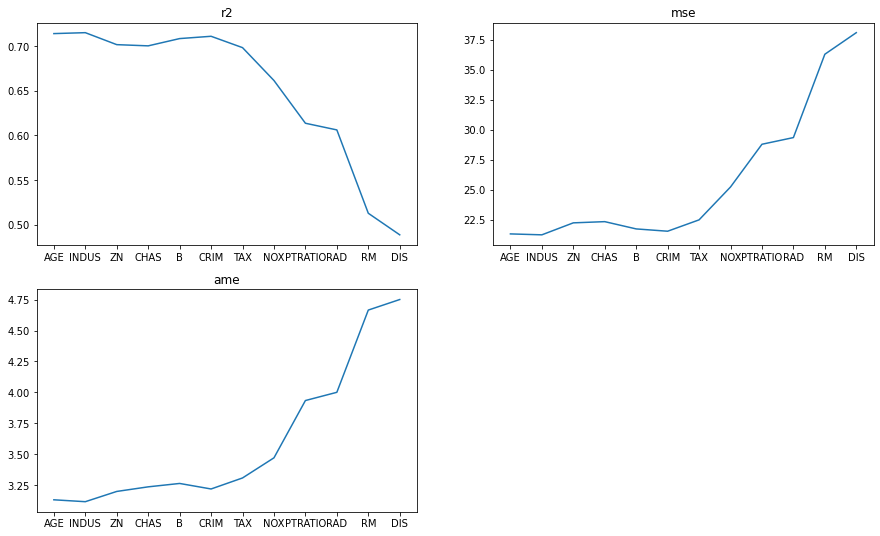

In [203]:
plt.figure(figsize=(15, 9))

plt.subplot(221)
plt.plot(feature_weight.keys(), r2_graph)
plt.title('r2')

plt.subplot(222)
plt.plot(feature_weight.keys(), mse_graph)
plt.title('mse')

plt.subplot(223)
plt.plot(feature_weight.keys(), ame_graph)
plt.title('ame')

Видим, что если убрать AGE и INDUS то у $R^{2}$ получается пик, а у остальных - минимумы, что, видимо, является оптимальным вариантом, но также можно видеть, что если убрать фичи вплоть до CRIM, то там тоже своего рода минимум по ошибкам и небольшой максимум в $R^{2}$

## Задание 2

Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [205]:
from sklearn.ensemble import RandomForestRegressor

In [220]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [218]:
y_train_forest = y_train.values[:, 0]

In [221]:
model.fit(X_train_scaled, y_train_forest)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [222]:
y_pred_forest = model.predict(X_test_scaled)

In [223]:
metrics.r2_score(y_test, y_pred_forest)

0.8745853339617797

In [224]:
model.fit(X_train, y_train_forest)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [225]:
y_pred_forest = model.predict(X_test)

In [226]:
metrics.r2_score(y_test, y_pred_forest)

0.87472606157312